# 𝕆𝕦𝕥 𝕠𝕗 𝕕𝕚𝕤𝕥𝕣𝕚𝕓𝕦𝕥𝕚𝕠𝕟

Source:
* https://github.com/bentrevett/pytorch-seq2seq/blob/master/6%20-%20Attention%20is%20All%20You%20Need.ipynb

In [1]:
import os


import torch
import torch.nn
import torch.optim as optim
from torch.autograd import Variable


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

import random
import math
import time


# vae
import argparse
import pickle

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import lmdb
from tqdm import tqdm

import sys
sys.path.insert(0, "helper")
from helper.dataset.vqvae import ImageFileDataset, CodeRow
from helper.model.vqvae import VQVAE



# not sure i am using this ... maybe it's automatically??
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



inserted: 2:   0%|                                                                            | 0/1168 [00:17<?, ?it/s]

(4, 64, 32, 32)
(4, 64, 64, 64)
[0.0014689]
torch.Size([4, 32, 32])
torch.Size([4, 64, 64])
(32, 32)
(64, 64)
Images\Video1_frame000090.png
(32, 32)
(64, 64)
Images\Video1_frame000100.png
(32, 32)
(64, 64)
Images\Video1_frame000110.png


inserted: 4:   0%|                                                                  | 1/1168 [00:18<5:54:01, 18.20s/it]

(32, 32)
(64, 64)
Images\Video1_frame000120.png


inserted: 6:   0%|                                                                  | 1/1168 [00:18<5:54:01, 18.20s/it]

(4, 64, 32, 32)
(4, 64, 64, 64)
[0.00145625]
torch.Size([4, 32, 32])
torch.Size([4, 64, 64])
(32, 32)
(64, 64)
Images\Video1_frame000130.png
(32, 32)
(64, 64)
Images\Video1_frame000140.png
(32, 32)
(64, 64)
Images\Video1_frame000150.png


inserted: 8:   0%|                                                                  | 2/1168 [00:18<2:32:05,  7.83s/it]

(32, 32)
(64, 64)
Images\Video1_frame000160.png


C:\Users\Prinzessin\AppData\Local\Temp\ipykernel_23868\3119885781.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
inserted: 11:   0%|                                                                 | 2/1168 [00:19<2:32:05,  7.83s/it]

(4, 64, 32, 32)
(4, 64, 64, 64)
[0.00138064]
torch.Size([4, 32, 32])
torch.Size([4, 64, 64])
(32, 32)
(64, 64)
Images\Video1_frame000170.png
(32, 32)
(64, 64)
Images\Video1_frame000180.png
(32, 32)
(64, 64)
Images\Video1_frame000190.png
(32, 32)
(64, 64)
Images\Video1_frame000200.png


inserted: 12:   0%|▏                                                                | 3/1168 [00:19<2:09:21,  6.66s/it]


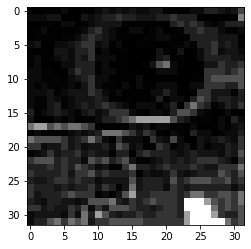

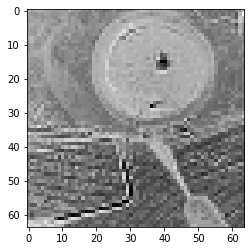

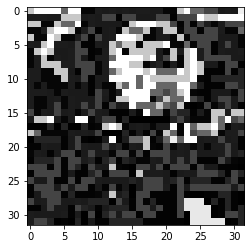

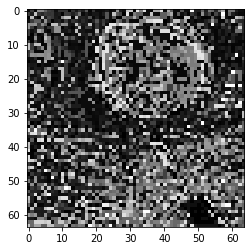

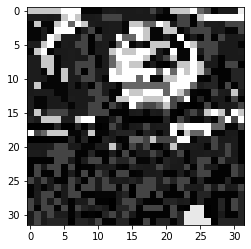

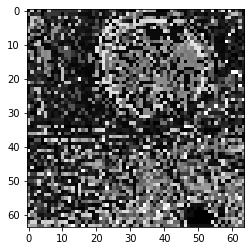

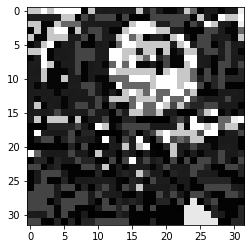

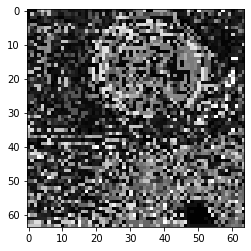

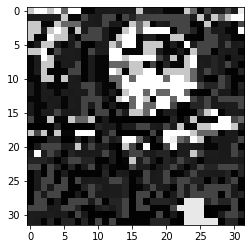

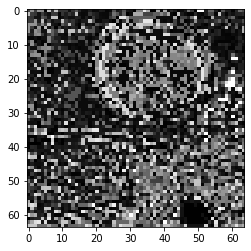

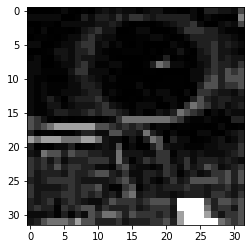

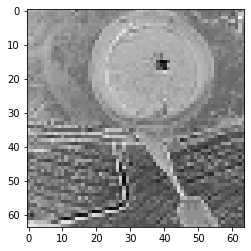

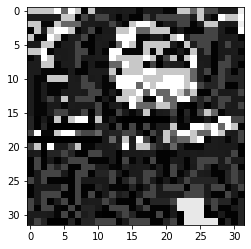

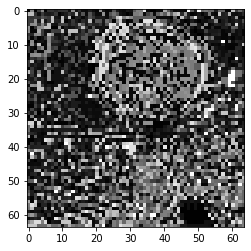

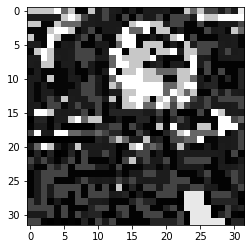

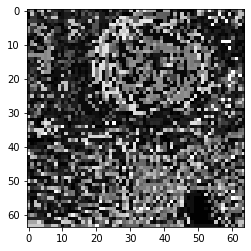

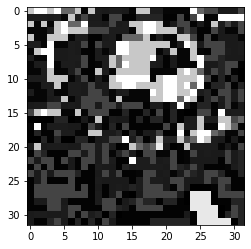

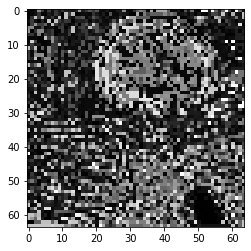

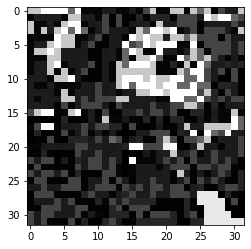

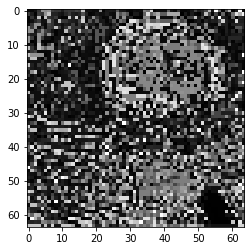

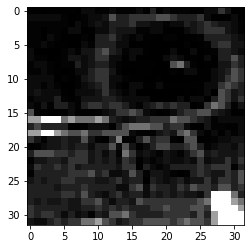

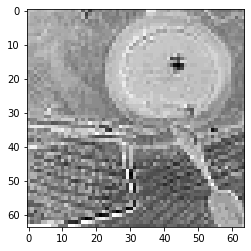

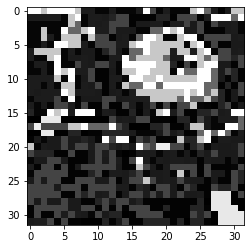

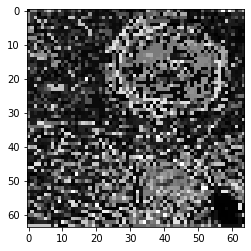

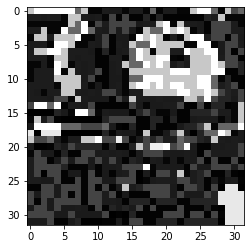

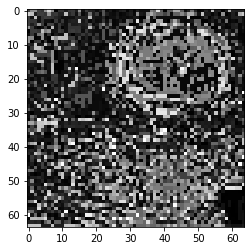

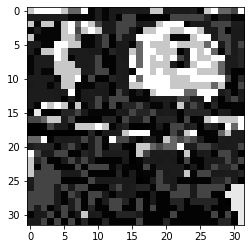

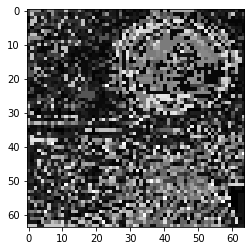

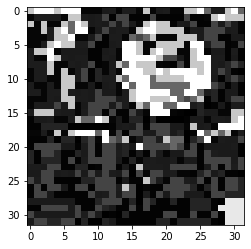

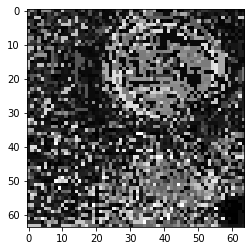

In [8]:
def extract(lmdb_env, loader, model, device):
    index = 0
    
    with lmdb_env.begin(write=True) as txn:
        pbar = tqdm(loader)

        for img, _, filename in pbar:
            
            if index > 8:
                break
            
            img = img.to(device)

            a, b, c, id_t, id_b = model.encode(img)
            # _, _, _, id_t, id_b = model.encode(img)
            
            a = a.detach().cpu().numpy()
            b = b.detach().cpu().numpy()
            c = c.detach().cpu().numpy()
            
            print(a.shape)
            print(b.shape)
            print(c)
            print(id_t.shape)
            print(id_b.shape)
            
            plt.figure()
            plt.imshow(a[0][0], cmap="gray")
            plt.figure()
            plt.imshow(b[0][0], cmap="gray")
            
            id_t = id_t.detach().cpu().numpy()
            id_b = id_b.detach().cpu().numpy()

            for file, top, bottom in zip(filename, id_t, id_b):
                row = CodeRow(top=top, bottom=bottom, filename=file)
                
                print(top.shape)
                print(bottom.shape)
                print(file)
                
                plt.figure()
                plt.imshow(top, cmap="gray")
                plt.figure()
                plt.imshow(bottom, cmap="gray")
                
                txn.put(str(index).encode('utf-8'), pickle.dumps(row))
                index += 1
                pbar.set_description(f'inserted: {index}')

        txn.put('length'.encode('utf-8'), str(index).encode('utf-8'))


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    #parser.add_argument('--size', type=int, default=256)
    #parser.add_argument('--ckpt', type=str)
    #parser.add_argument('--name', type=str)
    #parser.add_argument('path', type=str)

    #args = parser.parse_args()
    
    
    size = 256
    ckpt = r"C:/Users/Prinzessin/projects/cataract/vq-vae-2-pytorch-master/checkpoint/vqvae_235.pt"
    name = "gouda"
    path = r"C:/Users/Prinzessin/projects/image_data/cataract_CaDISv2/data"
    

    device = 'cuda:0'

    transform = transforms.Compose(
        [
            transforms.Resize(size),
            transforms.CenterCrop(size),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ]
    )

    dataset = ImageFileDataset(path, transform=transform)
    loader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=4)

    # Choose whatever GPU device number you want
    # model.load_state_dict(torch.load(PATH, map_location="cuda:0"))
    
    model = VQVAE()
    model.load_state_dict(torch.load(ckpt, map_location="cuda:0"))
    model = model.to(device)
    model.eval()

    map_size = 100 * 256 * 256 * 256 # 100 * 1024 * 1024 * 1024

    env = lmdb.open(name, map_size=map_size)

    extract(env, loader, model, device)


# Prepare Data

In [ ]:
spacy_vae_features = spacy.load('de_core_news_sm')
spacy_i_dont_know = spacy.load('en_core_web_sm')

def tokenize_vae_features(text):
    """
    Tokenizes vae autoencoders from a numpy array
    """
    return [tok.text for tok in spacy_de.tokenizer(text)]

def tokenize_i_dont_know(text):
    """
    Class labels???
    """
    return [tok.text for tok in spacy_en.tokenizer(text)]


SRC = Field(tokenize = tokenize_vae_features, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)

TRG = Field(tokenize = tokenize_i_dont_know, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)



# Dataset

In [ ]:
train_data, valid_data, test_data = Multi30k.splits(exts = ('.de', '.en'), 
                                                    fields = (SRC, TRG))

SRC.build_vocab(train_data, min_freq = 2)
TRG.build_vocab(train_data, min_freq = 2)


train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
     batch_size = BATCH_SIZE,
     device = device)



# Model
* https://pytorch.org/text/main/tutorials/t5_demo.html#generate-sentiment-classifications

In [ ]:
batch = next(iter(imdb_dataloader))
input_text = batch["text"]
target = batch["label"]
beam_size = 1

model_input = transform(input_text)
model_output = sequence_generator.generate(model_input, eos_idx=eos_idx, num_beams=beam_size)
output_text = transform.decode(model_output.tolist())

for i in range(imdb_batch_size):
    print(f"Example {i+1}:\n")
    print(f"input_text: {input_text[i]}\n")
    print(f"prediction: {output_text[i]}\n")
    print(f"target: {target[i]}\n\n")

In [1]:
# Example - Pretrained large xlmr encoder attached to un-initialized classification head

import torch, torchtext
from torchtext.models import RobertaClassificationHead
from torchtext.functional import to_tensor
xlmr_large = torchtext.models.XLMR_LARGE_ENCODER
classifier_head = torchtext.models.RobertaClassificationHead(num_classes=2, input_dim = 1024)
model = xlmr_large.get_model(head=classifier_head)
transform = xlmr_large.transform()
input_batch = ["Hello world", "How are you!"]
model_input = to_tensor(transform(input_batch), padding_value=1)
output = model(model_input)
output.shape



ModuleNotFoundError: No module named 'torchtext'

In [2]:
from torchtext.models import RobertaEncoderConf, RobertaBundle, RobertaClassificationHead
model_weights_path = "https://download.pytorch.org/models/text/xlmr.base.encoder.pt"
encoder_conf = RobertaEncoderConf(vocab_size=250002)
classifier_head = RobertaClassificationHead(num_classes=18, input_dim=768)
model = RobertaBundle.build_model(encoder_conf=encoder_conf, head=classifier_head, checkpoint=model_weights_path)

ModuleNotFoundError: No module named 'torchtext'

In [ ]:

class OODModel(torch.nn.Module):
    # =============================================================================
    # use this
    # encoder backbone (shufflenet_v2_x1_0) + projection head (MLP)
    # output size of MLP: 128 
    # this feature vector is then used for the SupConLoss

    # Replace model head:
    # https://discuss.pytorch.org/t/how-to-replace-a-models-head/109002/2
    # shuffle net: (fc): Linear(in_features=1024, out_features=1000, bias=True)

    # this function is used to train a DecentBlock with the SupConLoss
    # =============================================================================
    
    def __init__(self, out_classes=20):
        super(OODModel, self).__init__()
        
        self.out_classes = out_classes
        
        # encoder
        try:
            shufflenet = shufflenet_v2_x1_0(weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1)
        except: 
            shufflenet = shufflenet_v2_x1_0(pretrained=True)
                    
        # size of encoder output
        encoder_out = shufflenet.fc.in_features
            
        # placeholder identity operator 
        shufflenet.fc = torch.nn.Identity()
                
        # encoder without fully connected classification head (linear layer)
        self.encoder = shufflenet
        
        # maybe we need concatenation or view change here ... 1x1 conv??
        
        # MLP head
        self.mlp_head = torch.nn.Sequential(
            torch.nn.Linear(encoder_out, encoder_out),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(encoder_out, 128)
        )
        
        self.classification = torch.nn.Sequential(
            torch.nn.Linear(128, self.out_classes)
        )
        

    def forward(self, x):
        x = self.encoder(x)
        x = self.mlp_head(x)
        block_output = torch.nn.functional.normalize(x, dim=1)
        
        
        
        return block_output